In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("../Dataset/CSV-Train/10_1.csv",index_col="Reg_No")
data.shape

(1769, 116)

In [3]:
data.describe()

,Scheme_2015,Scheme_2019,Dept_CSE,Dept_Civil,Dept_ECE,Dept_EEE,Dept_IT,Dept_MECH,S1_D_BE10101,S1_D_BE10102,...,S1_S_grade,S1_E_grade,S1_A_grade,S2_C_grade,S2_D_grade,S2_E_grade,S2_T_grade,S2_A_grade,S2_B_grade,S2_S_grade
count,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,...,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000
mean,0.722442,0.277558,0.295082,0.139627,0.150933,0.080837,0.076880,0.256642,0.106840,0.198982,...,8.086490,2.594121,3.493499,3.410401,4.413793,2.422838,7.363482,3.735444,3.634822,7.972301
std,0.447921,0.447921,0.456209,0.346698,0.358085,0.272661,0.266476,0.436904,0.308997,0.399348,...,1.369052,2.258791,2.912970,2.766768,2.349437,2.131921,1.617089,2.801925,2.712058,1.396028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,1.000000,0.000000,1.000000,3.000000,1.000000,6.000000,1.000000,1.000000,7.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.000000,3.000000,3.000000,5.000000,2.000000,8.000000,3.000000,3.000000,9.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,9.000000,4.000000,6.000000,5.000000,6.000000,4.000000,9.000000,6.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [4]:
grade_col = [col for col in data.columns if col.endswith("grade")]
X = data.drop(grade_col, axis=1)
y = data[grade_col]
X.shape,y.shape

((1769, 101), (1769, 15))

In [20]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [41]:
class CustomSampler:
    def __init__(self, sampler):
        self.sampler = sampler

    def fit_resample(self, X, y):
        try:
            return self.sampler.fit_resample(X, y)
        except:
            return RandomOverSampler().fit_resample(X, y)

In [16]:
dct=DecisionTreeClassifier(random_state=0)
gsv=GridSearchCV(dct,param_grid={
    'criterion':["gini", "entropy", "log_loss"],
    # 'max_depth':[30,20],
    'min_samples_split':[2],
    'min_samples_leaf':[2],
    'max_features':['sqrt','log2']
},scoring='f1_weighted',n_jobs=-1,verbose=3,return_train_score=True)

In [ ]:
def results(y_true,y_pred,gsv):
	cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
	print(gsv.best_params_)
	
	print('Accuracy\t=',accuracy_score(y_true,y_pred))
	print('Precision\t=',precision_score(y_true,y_pred,average='macro'))
	print('F1 score\t=',f1_score(y_true,y_pred,average='macro'))
	print('Recall\t=',recall_score(y_true,y_pred,average='micro'))
	
	ConfusionMatrixDisplay(cm,display_labels=['F','P','D','C','C+','B','B+','A','A+','S']).plot()
	# break

d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


========= S1_D_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.49767441860465117
Precision	= 0.5126006567132528
F1 score	= 0.5020844709986074
Recall	= 0.49767441860465117
========= S2_F_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.4089171974522293
Precision	= 0.41952282450155637
F1 score	= 0.412371061407889
Recall	= 0.4089171974522293
========= S1_C_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.6162097735399285
Precision	= 0.6253197659163596
F1 score	= 0.6191745917895085
Recall	= 0.6162097735399285
========= S1_T_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.8882220555138785
Precision	= 0.8917191385524255
F1 score	= 0.8901089448879977
Recall	= 0.8882220555138785


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


========= S1_B_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.408641975308642
Precision	= 0.42407248277069554
F1 score	= 0.4109123663625204
Recall	= 0.408641975308642
========= S1_S_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.8852901484480432
Precision	= 0.8858430536595504
F1 score	= 0.8846066107516852
Recall	= 0.8852901484480432
========= S1_E_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.6747382198952879
Precision	= 0.6853352026486518
F1 score	= 0.6799781197233613
Recall	= 0.6747382198952879
========= S1_A_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.4956140350877193
Precision	= 0.5122513948085048
F1 score	= 0.5007981345416269
Recall	= 0.4956140350877193
========= S2_C_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.5085877862595419
Precision	= 0.5176198461837378
F1 score	= 0.5109289052789856
Recall	= 0.5085877862595419
========= S2_D_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.42958579881656805
Precision	= 0.4119103652930443
F1 score	= 0.4187347171510864
Recall	= 0.42958579881656805
========= S2_E_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.6705882352941176
Precision	= 0.6787076442967768
F1 score	= 0.6731179964647677
Recall	= 0.6705882352941176
========= S2_T_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.8837025316455697
Precision	= 0.8869892744592953
F1 score	= 0.8858078321780478
Recall	= 0.8837025316455697


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


========= S2_A_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.43291139240506327
Precision	= 0.44243544054987316
F1 score	= 0.43508035441085385
Recall	= 0.43291139240506327
========= S2_B_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.37789904502046384
Precision	= 0.3805962328887832
F1 score	= 0.37705907631023405
Recall	= 0.37789904502046384
========= S2_S_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.9557142857142857
Precision	= 0.9566601763769348
F1 score	= 0.9551782317867258
Recall	= 0.9557142857142857


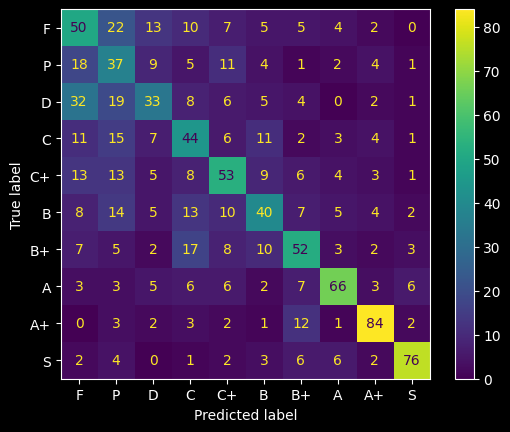

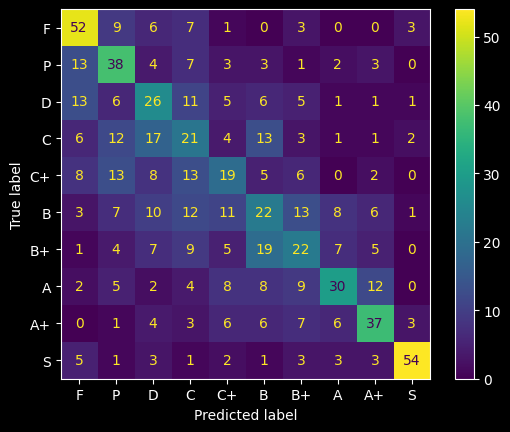

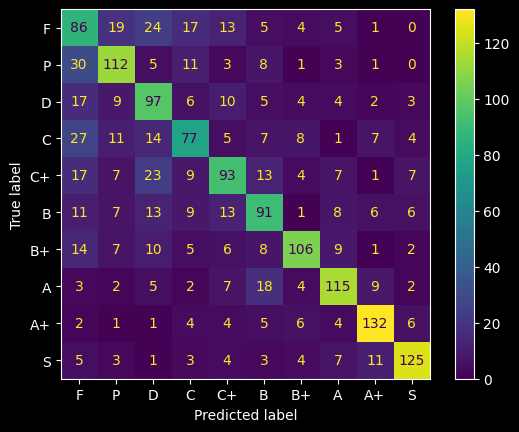

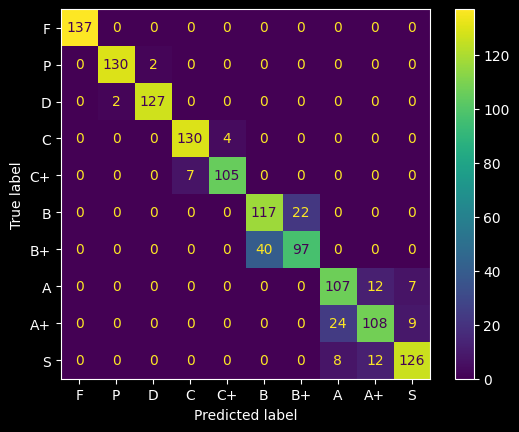

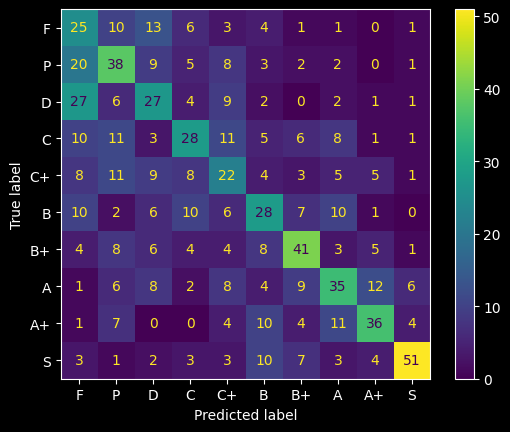

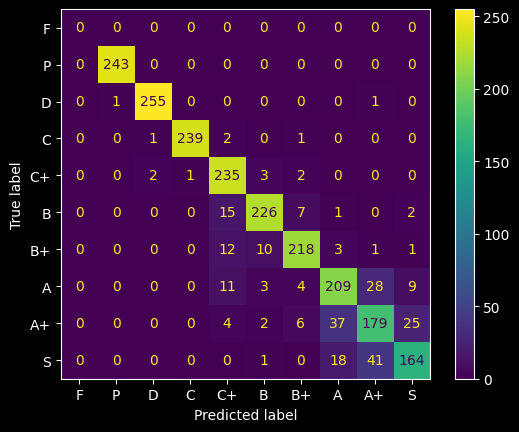

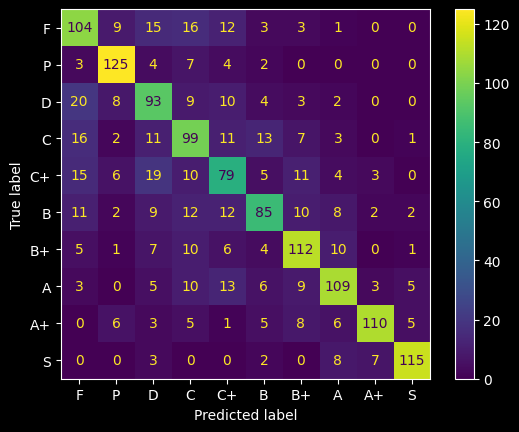

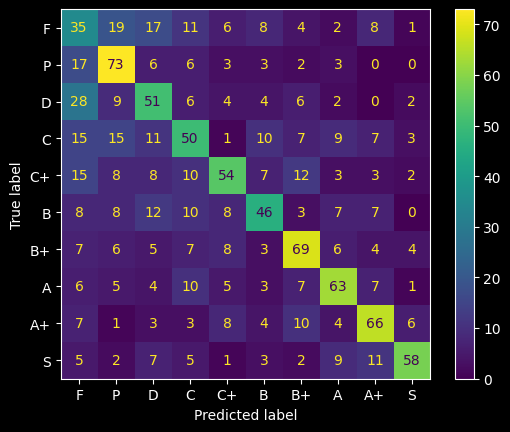

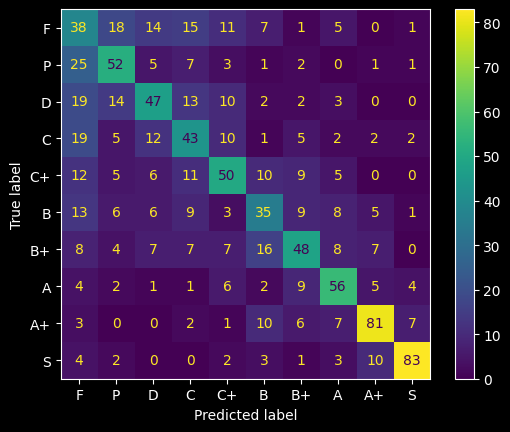

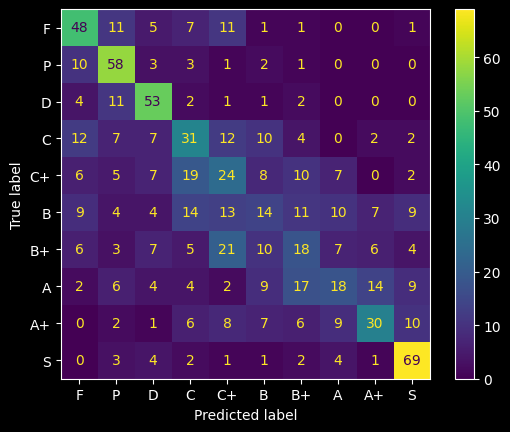

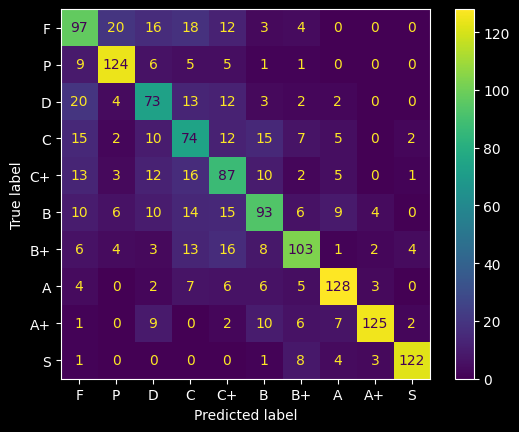

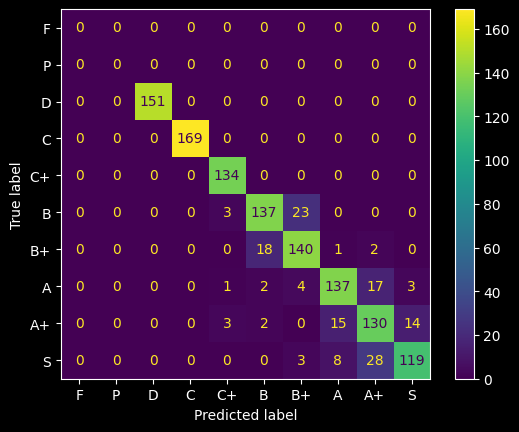

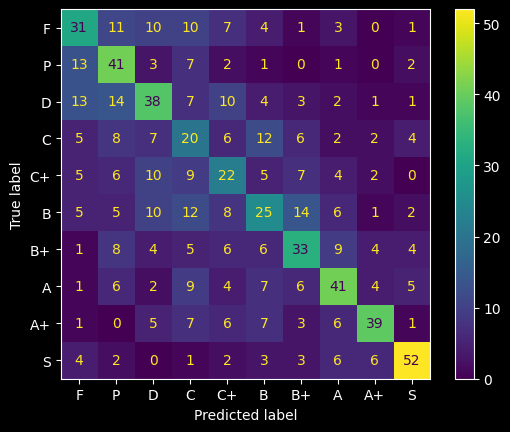

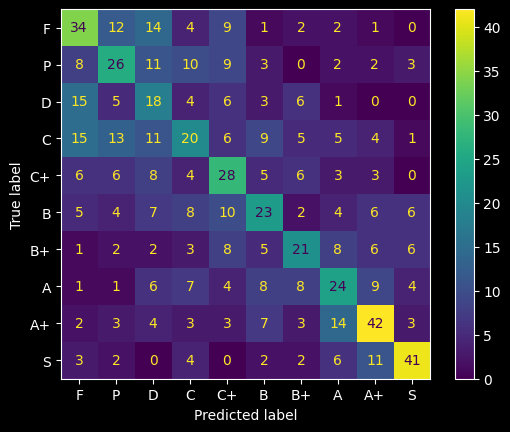

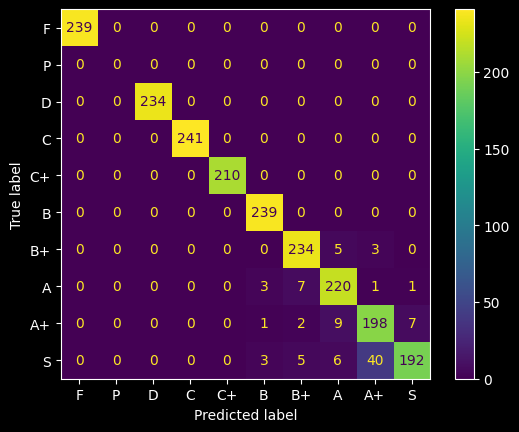

In [44]:
for slot in y.columns:
	sm=SMOTE(random_state=0,n_jobs=-1,k_neighbors=5)
	cs=CustomSampler(sm)
	X_res,y_res=cs.fit_resample(X,y[slot])

	X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=0)

	print('=========',slot,'=========')

	gsv.fit(X_train,y_train)

	y_true=y_test
	y_pred=gsv.predict(X_test)

	# y_true=y_train
	# y_pred=gsv.predict(X_train)

	results()
	# break


<function matplotlib.pyplot.show(close=None, block=None)>

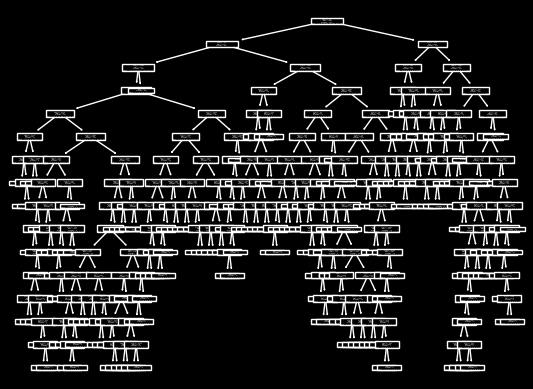

In [11]:
tree.plot_tree(gsv.best_estimator_)
plt.show
